# Área de Dados

A melhoria do processamento dos computadores, o surgimento de tecnologias como computação em nuvem, machine e a possibilidade da coleta de dados de diversos equipamentos através da Internet das Coisas (_Internet of Things_, _IoT_) fez com que uma enorme quantidade de dados (_Big Data_) começasse a ser produzido. 

Esses dados, quando refinados, analisados e interpretados, podem trazer poderosas descobertas que melhoram as tomadas de decisão, ajudando a construir estratégias de mercado/negócios e a diminuir custos. 

Existem diversas possibilidades de atuação na área, como por exemplo, na coleta e limpeza dos dados, análises exploratórias desses dados, construção e implantação de modelos de aprendizado de máquina (_machine learning_), e interpretação dos resultados desses modelos. 

Os profissionais da área de dados podem ser divididos nas seguintes profissões:
- Engenheiro de dados: responsável pela coleta e limpeza dos dados
- Analista de dados: pode realizar limpeza dos dados e também é responsável pela análise exploratória desses dados
- Engenheiro de _machine learning_: constrói e implanta os modelos
- Cientista de dados: pode realizar qualquer uma dessas etapas

Neste estudo analisaremos os dados coletados na pesquisa [State of Data Brazil](https://www.stateofdata.com.br/) do ano de 2022, que fornece um panorama sobre o mercado de trabalho na área de dados no Brasil. Essa pesquisa foi realizada pela **Data Hackers** e a **Bain & Company**, no período de 10 de outubro a 28 de novembro de 2022. O arquivo .csv com as respostas dos 4.271 participantes pode ser obtido na plataforma [Kaggle](https://www.kaggle.com/datasets/datahackers/state-of-data-2022).   

# State of Data Brazil 2022

A pesquisa é dividida em 8 partes, totalizando 352 colunas (contando com a coluna de id, identificada como P0):

Parte 1 - Dados demográfico\
Parte 2 - Dados sobre carreira\
Parte 3 - Desafios dos gestores de times de dados\
Parte 4 - Conhecimentos na área de dados\
Parte 5 - Objetivos na área de dados\
Parte 6 - Conhecimentos em Engenharia de Dados/DE\
Parte 7 - Conhecimentos em Análise de Dados/DA\
Parte 8 - Conhecimentos em Ciências de Dados/DS

Algumas perguntas podem ter respostas multi-valoradas, então ocupando mais de uma coluna no dataset. Dessa forma, cada coluna é identificada como uma tupla (Pergunta,Alternativa escolhida), e as perguntas são divididas em Parte, Letra da pergunta e Número da opção escolhida:

- P3_a_1 = Parte 3, pergunta (a), opção (1)

A seguir são mostradas as perguntas mais gerais para cada parte do questionário.


In [70]:
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv('State_of_data_2022.csv', sep = ',')
df.drop("('P0', 'id')", axis = 1, inplace=True)
print(df.shape)

(4271, 352)


In [7]:
# Separando por partes
df_parte_1 = df.filter(like = 'P1', axis = 1)
df_parte_2 = df.filter(like = 'P2', axis = 1)
df_parte_3 = df.filter(like = 'P3', axis = 1)
df_parte_4 = df.filter(like = 'P4', axis = 1)
df_parte_5 = df.filter(like = 'P5', axis = 1)
df_parte_6 = df.filter(like = 'P6', axis = 1)
df_parte_7 = df.filter(like = 'P7', axis = 1)
df_parte_8 = df.filter(like = 'P8', axis = 1)

In [38]:
def get_perguntas(df_parte: pd.DataFrame,parte:int) -> None:
    columns   = list(df_parte.columns)
    print(f'Parte {parte} - Total de colunas: {len(columns)}')
    count = 0
    for c in columns:
        aux            = c.split('(')[1].split(')')[0]
        identificador1 = aux.split(',')[0]
        if len(identificador1.split('_')) <= 2:
            print(aux)
            count += 1
    print(f'Total de perguntas gerais: {count}')        

In [39]:
get_perguntas(df_parte_1,1)

Parte 1 - Total de colunas: 15
'P1_a ', 'Idade'
'P1_b ', 'Genero'
'P1_c ', 'Cor/raca/etnia'
'P1_d ', 'PCD'
'P1_e ', 'experiencia_profissional_prejudicada'
'P1_f ', 'aspectos_prejudicados'
'P1_g ', 'vive_no_brasil'
'P1_i ', 'Estado onde mora'
'P1_j ', 'Mudou de Estado?'
'P1_k ', 'Regiao de origem'
'P1_l ', 'Nivel de Ensino'
'P1_m ', 'Área de Formação'
Total de perguntas gerais: 12


In [40]:
get_perguntas(df_parte_2,2)

Parte 2 - Total de colunas: 36
'P2_a ', 'Qual sua situação atual de trabalho?'
'P2_b ', 'Setor'
'P2_c ', 'Numero de Funcionarios'
'P2_d ', 'Gestor?'
'P2_e ', 'Cargo como Gestor'
'P2_f ', 'Cargo Atual'
'P2_g ', 'Nivel'
'P2_h ', 'Faixa salarial'
'P2_i ', 'Quanto tempo de experiência na área de dados você tem?'
'P2_j ', 'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?'
'P2_k ', 'Você está satisfeito na sua empresa atual?'
'P2_l ', 'Qual o principal motivo da sua insatisfação com a empresa atual?'
'P2_m ', 'Você participou de entrevistas de emprego nos últimos 6 meses?'
'P2_n ', 'Você pretende mudar de emprego nos próximos 6 meses?'
'P2_o ', 'Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?'
'P2_p ', 'Atualmente qual a sua forma de trabalho?'
'P2_q ', 'Qual a forma de trabalho ideal para você?'
'P2_r ', 'Caso sua empresa decida pelo modelo 100% presencial qual será sua

In [41]:
get_perguntas(df_parte_3,3)

Parte 3 - Total de colunas: 38
'P3_a ', 'Qual o número aproximado de pessoas que atuam com dados na sua empresa hoje?'
'P3_b ', 'Quais desses papéis/cargos fazem parte do time 
'P3_c ', 'Quais dessas responsabilidades fazem parte da sua rotina atual de trabalho como gestor?'
'P3_d ', 'Quais são os 3 maiores desafios que você tem como gestor no atual momento?'
Total de perguntas gerais: 4


In [42]:
get_perguntas(df_parte_4,4)

Parte 4 - Total de colunas: 100
'P4_a ', 'Mesmo que esse não seja seu cargo formal, você considera que sua atuação no dia a dia, reflete alguma das opções listadas abaixo?'
'P4_b ', 'Quais das fontes de dados listadas você já analisou ou processou no trabalho?'
'P4_c ', 'Entre as fontes de dados listadas, quais você utiliza na maior parte do tempo?'
'P4_d ', 'Quais das linguagens listadas abaixo você utiliza no trabalho?'
'P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?'
'P4_f ', 'Entre as linguagens listadas abaixo, qual é a sua preferida?'
'P4_g ', 'Quais dos bancos de dados/fontes de dados listados abaixo você utiliza no trabalho?'
'P4_g ', 'Quais das opções de Cloud listadas abaixo você utiliza no trabalho?'
'P4_h ', 'Dentre as opções listadas, qual sua Cloud preferida?'
'P4_i ', 'Microsoft PowerBI'
Total de perguntas gerais: 10


In [43]:
get_perguntas(df_parte_5,5)

Parte 5 - Total de colunas: 4
'P5_a ', 'Qual seu objetivo na área de dados?'
'P5_b ', 'Qual oportunidade você está buscando?'
'P5_c ', 'Há quanto tempo você busca uma oportunidade na área de dados?'
'P5_d ', 'Como tem sido a busca por um emprego na área de dados?'
Total de perguntas gerais: 4


In [44]:
get_perguntas(df_parte_6,6)

Parte 6 - Total de colunas: 59
'P6_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual como engenheiro de dados?'
'P6_b ', 'Quais as ferramentas/tecnologias de ETL que você utiliza no trabalho como Data Engineer?'
'P6_c ', 'Sua organização possui um Data Lake?'
'P6_d ', 'Qual tecnologia utilizada como plataforma do Data Lake?'
'P6_e ', 'Sua organização possui um Data Warehouse?'
'P6_f ', 'Qual tecnologia utilizada como plataforma do Data Warehouse?'
'P6_g ', 'Quais as ferramentas de gestão de Qualidade de dados, Metadados e catálogo de dados você utiliza no trabalho?'
'P6_h ', 'Em qual das opções abaixo você gasta a maior parte do seu tempo?'
Total de perguntas gerais: 8


In [45]:
get_perguntas(df_parte_7,7)

Parte 7 - Total de colunas: 50
'P7_1 ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual com análise de dados?'
'P7_b ', 'Quais as ferramentas/tecnologias de ETL que você utiliza no trabalho como Data Analyst?'
'P7_c ', 'Sua empresa utiliza alguma das ferramentas listadas para dar mais autonomia em análise de dados para as áreas de negócio?'
'P7_d ', 'Em qual das opções abaixo você gasta a maior parte do seu tempo de trabalho?'
Total de perguntas gerais: 4


In [46]:
get_perguntas(df_parte_8,8)

Parte 8 - Total de colunas: 50
'P8_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual com ciência de dados?'
'P8_b ', 'Quais as técnicas e métodos listados abaixo você costuma utilizar no trabalho?'
'P8_3 ', 'Quais dessas tecnologias fazem parte do seu dia a dia como cientista de dados?'
'P8_d ', 'Em qual das opções abaixo você gasta a maior parte do seu tempo no trabalho?'
Total de perguntas gerais: 4


# Profissionais por Estado do Brasil

Primeiro é verificado que 100 profissionais que responderam o questionário não vivem no Brasil. Depois, que 15 profissionais não responderam (ou suas respostas foram retiradas a fim de garantir o anonimato, como é comentado na documentação do dataset) em qual estado moram.

Para conseguir o número de profissionais por estado do Brasil, é realizada uma operação de groupby pela coluna _('P1_i ', 'Estado onde mora')_ e depois é criado o gráfico de barras horizontais, apresentado abaixo. 


In [85]:
num_profissionais_nao_moram_brasil = df_parte_1[df_parte_1["('P1_g ', 'vive_no_brasil')"]==False].shape[0] 
mascara_sem_estado                 = (df_parte_1["('P1_i ', 'Estado onde mora')"].isnull()) & (df_parte_1["('P1_g ', 'vive_no_brasil')"]==True)
num_profissionais_nao_responderam  = df_parte_1[mascara].shape[0] 

print(f'Número de profissionais que não moram no Brasil: {num_profissionais_nao_moram_brasil}')
print(f'Número de profissionais que não tem Estado: {num_profissionais_nao_responderam}')

Número de profissionais que não moram no Brasil: 100
Número de profissionais que não tem Estado: 15


Text(0.5, 1.0, 'Profissionais por Estado do Brasil')

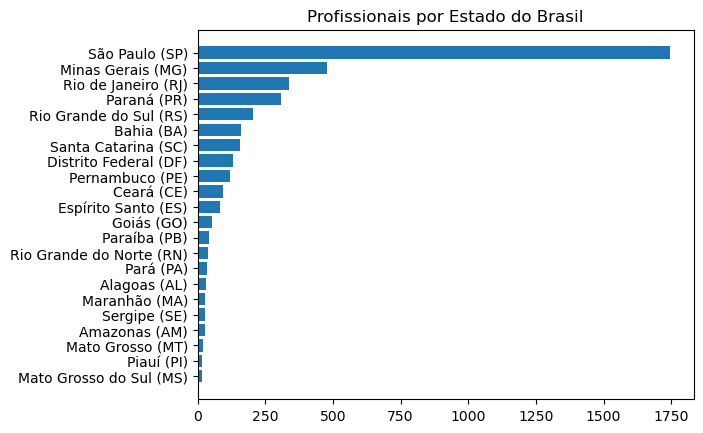

In [78]:
df_profissionais_por_estado = df_parte_1.groupby("('P1_i ', 'Estado onde mora')")["('P1_i ', 'Estado onde mora')"].count().sort_values()
indexes_prof_por_estado     = df_profissionais_por_estado.index
values_prof_por_estado      = df_profissionais_por_estado.values  

plt.barh(indexes_prof_por_estado, values_prof_por_estado)
plt.title('Profissionais por Estado do Brasil')

O Estado de São Paulo possui a grande maioria de profissionais e outros dois Estados do Sudeste, Minas Gerais e Rio de Janeiro, ficam com o 2º e 3º lugares. Os Estados do Acre, Amapá, Roraima, Tocantins (Norte) e Mato Grosso (Centro-Oeste) não tiveram profissionais. 

Porém, contando o número de profissionais na região Norte, percebe-se que esse número é maior que a soma dos profissionais do Amazonas e do Pará. Ao filtrar quais profissionais são da região Norte mas não possuem resposta em Estado, obtemos a quantidade de 15, que é exatamente a quantidade que encontramos anteriormente de profissionais que não tem Estado. 

Text(0.5, 1.0, 'Profissionais por Região do Brasil')

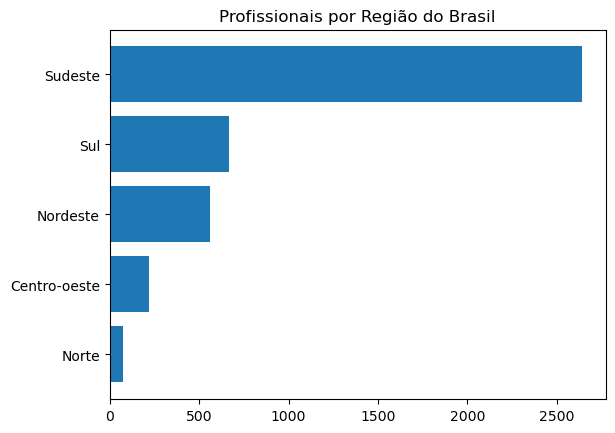

In [92]:
df_profissionais_regiao    = df_parte_1.groupby("('P1_i_2 ', 'Regiao onde mora')")["('P1_i_2 ', 'Regiao onde mora')"].count().sort_values()
indexes_prof_por_regiao    = df_profissionais_regiao.index
values_prof_por_regiao     = df_profissionais_regiao.values  

plt.barh(indexes_prof_por_regiao, values_prof_por_regiao)
plt.title('Profissionais por Região do Brasil')

In [91]:


num_prof_AM                = df_profissionais_por_estado['Amazonas (AM)']
num_prof_PA                = df_profissionais_por_estado['Pará (PA)']
mascara_prof_norte_sem_est = (df_parte_1["('P1_i_2 ', 'Regiao onde mora')"] == 'Norte') & (df_parte_1["('P1_i ', 'Estado onde mora')"].isnull())
num_prof_norte_sem_estado  = df_parte_1[mascara_prof_norte_sem_est].shape[0]

print(f'Número de profissionais no Norte: {df_profissionais_regiao["Norte"]}')
print(f'Número de profissionais no Amazonas: {num_prof_AM}')
print(f'Número de profissionais no Pará: {num_prof_PA}')
print(f'Número de profissionais no Norte mas sem Estado: {num_prof_norte_sem_estado}')



Número de profissionais no Norte: 76
Número de profissionais no Amazonas: 26
Número de profissionais no Pará: 35
Número de profissionais no Norte mas sem Estado: 15


In [ ]:
colunas = []
for elemento in lista_colunas:
  if 'P2' in elemento:
    colunas.append(elemento)

In [ ]:
dados[colunas]

Perguntas possíveis:

Dados Gerais
- idade
- gênero
- ensino / formação acadêmica

Carreira
- modo de trabalho (remoto, presencial, híbrido)

Satisfação (opcional)
- satisfação / insatisfação
- motivos da insatisfação (gráfico comparativo barras)

Densidade geográfica
- Densidade de profissionais por estado
- Densidade de profissionais por gênero
- Densidade de profissionais por raça
- Densidade de profissionais pcd

Salário
- geral
- por cargo
- por tempo de carreira
- por gênero
- pcd
- por raça

Fontes de dados utilizados no trabalho

Tecnologias utilizadas
- linguagens no geral
- 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?' -> P4_e
- P4_g -> opções de cloud
- na área de ciência, engenharia e analista (tecnologias por nicho)

- procurar insights com a parte de ciência de dados - P8


obs: sobre os NaN, considerar apenas as pessoas que responderam

# Explicação do DataSet

~ explicação do kaggle